# 15.02.20

**Author:** Miron Rogovets

---

### Task 1. Open Worldbank_data.dta file.

Do the cluster analysis using hierarchical clustering algorithm. Select not less than 4 interval variables for the analysis. Don’t forget to standardize the values of variables if needed.

1. Define the number of clusters. Explain your decision.
2. Create a dendrogram.
3. Describe the clusters using descriptive statistics.
4. Try to name the obtained clusters.
5. Save cluster membership variable in the file.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans, AgglomerativeClustering

In [2]:
import pyreadstat
_, meta = pyreadstat.read_dta('data/Worldbank_data.dta')
meta.column_names_to_labels

{'year': 'Year',
 'groups': 'Groups of countries',
 'country_name': 'Country Name',
 'country_code': 'Country Code',
 'internet': 'Internet users (per 100 people)',
 'secure': 'Secure Internet servers (per 1 million people)',
 'export': 'Communications, computer, etc. (% of service exports)',
 'import': 'Communications, computer, etc. (% of service imports)',
 'telephone': 'Fixed telephone subscriptions (per 100 people)',
 'hightech': 'High-technology exports (current US$)',
 'mobile': 'Mobile cellular subscriptions (per 100 people)'}

In [3]:
df = pd.read_stata('data/Worldbank_data.dta')
df.head()

,year,groups,country_name,country_code,internet,secure,export,import,telephone,hightech,mobile
0,2015.0,3.0,Afghanistan,AFG,8.260000,1.414229,72.652794,9.053154,0.343677,NaN,61.577619
1,2015.0,2.0,Albania,ALB,63.252933,37.727137,25.303169,11.124101,7.091628,15123662.0,106.380207
2,2015.0,2.0,Algeria,DZA,38.200000,2.546228,59.256825,58.012028,8.041628,2449466.0,113.031094
3,2015.0,3.0,American Samoa,ASM,NaN,72.022759,NaN,NaN,18.005690,NaN,NaN
4,2015.0,1.0,Andorra,ADO,96.910000,1631.830630,NaN,NaN,47.992588,NaN,88.123533


In [4]:
print('Dimension of dataset: {}'.format(df.shape))
df.dtypes

Dimension of dataset: (217, 11)


year            float64
groups          float64
country_name     object
country_code     object
internet        float64
secure          float64
export          float64
import          float64
telephone       float64
hightech        float64
mobile          float64
dtype: object

In [5]:
df.groups.unique()

array([3., 2., 1.])

We drop columns that we are not going to use.

In [6]:
df.drop(columns=['year', 'country_name', 'country_code'], inplace=True)

In [7]:
df.isna().sum()

groups        0
internet     15
secure       10
export       73
import       94
telephone     8
hightech     82
mobile       13
dtype: int64

Our dataset is pretty small, so we should fill <code>nan</code> values. We will use <code>mean</code> values to fill <code>nan</code>

In [8]:
df.fillna(df.mean(), inplace=True)
print(df.isna().sum())
df.head()

groups       0
internet     0
secure       0
export       0
import       0
telephone    0
hightech     0
mobile       0
dtype: int64


,groups,internet,secure,export,import,telephone,hightech,mobile
0,3.0,8.260000,1.414229,72.652794,9.053154,0.343677,1.490164e+10,61.577619
1,2.0,63.252933,37.727137,25.303169,11.124101,7.091628,1.512366e+07,106.380207
2,2.0,38.200000,2.546228,59.256825,58.012028,8.041628,2.449466e+06,113.031094
3,3.0,48.573173,72.022759,35.117770,37.832033,18.005690,1.490164e+10,107.722941
4,1.0,96.910000,1631.830630,35.117770,37.832033,47.992588,1.490164e+10,88.123533


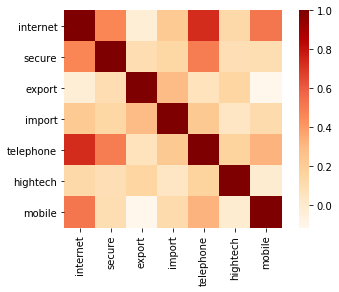

In [9]:
cols = df.columns.drop('groups')
cor = df[cols].corr()
sns.heatmap(cor, square = True, cmap='OrRd')

We do not have _high correlated (>0.8)_ variables, so we can proceed with clusterization.

The data should also be scaled, since the clustering is sensitive to range of data.

In [10]:
data = df[cols].copy()
data.head(2)

,internet,secure,export,import,telephone,hightech,mobile
0,8.260000,1.414229,72.652794,9.053154,0.343677,1.490164e+10,61.577619
1,63.252933,37.727137,25.303169,11.124101,7.091628,1.512366e+07,106.380207


In [11]:
scaler = MinMaxScaler()
data[data.columns] = scaler.fit_transform(data[data.columns])
data.head()

,internet,secure,export,import,telephone,hightech,mobile
0,0.073800,0.000134,0.838002,0.055168,0.002683,0.026885,0.171800
1,0.639339,0.003683,0.279072,0.081040,0.055363,0.000027,0.312959
2,0.381698,0.000245,0.679871,0.666796,0.062780,0.000004,0.333914
3,0.488374,0.007035,0.394926,0.414694,0.140568,0.026885,0.317189
4,0.985463,0.159487,0.394926,0.414694,0.374672,0.026885,0.255438


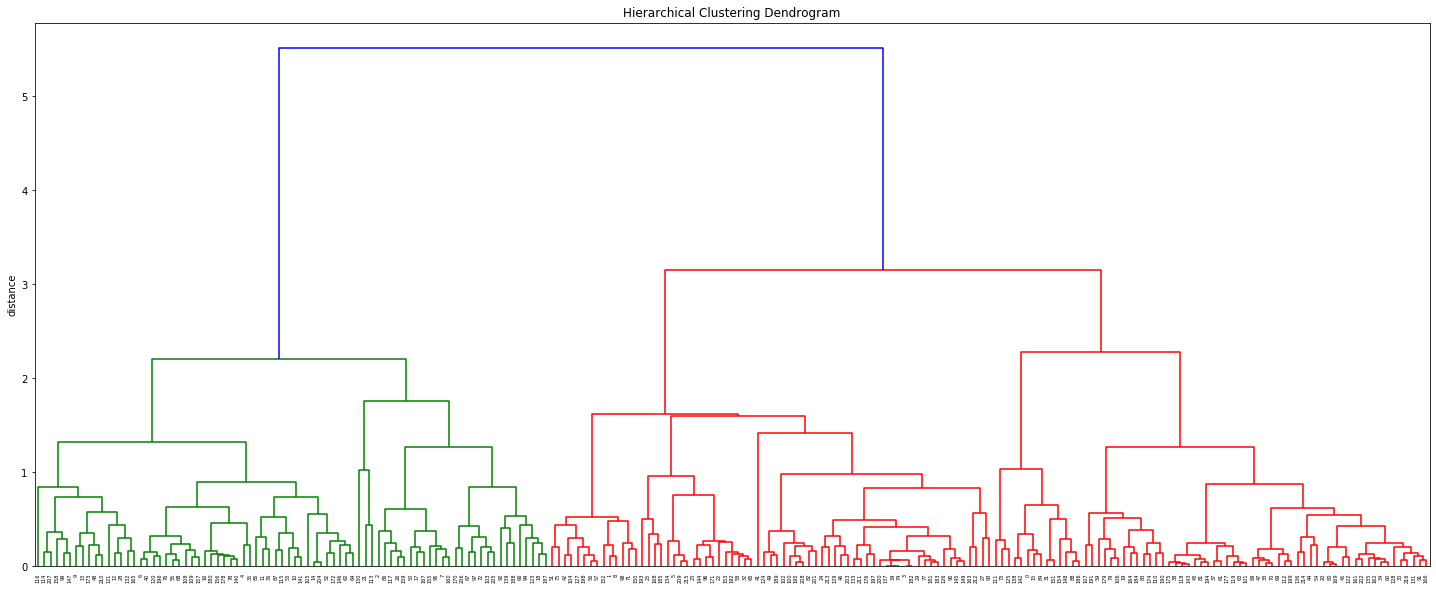

In [12]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram = sch.dendrogram(sch.linkage(data, method='ward'))
plt.ylabel('distance')
plt.show()

We can see that __3__ can be chosen as the number of clusters from the dendrogram above. Moreover, __three__ is the most reasonable number, since we have __3 different groups of countries__ in our dataset.

In [13]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
predicted = hc.fit_predict(data)

In [14]:
df['hierarchial'] = predicted
df.head()

,groups,internet,secure,export,import,telephone,hightech,mobile,hierarchial
0,3.0,8.260000,1.414229,72.652794,9.053154,0.343677,1.490164e+10,61.577619,0
1,2.0,63.252933,37.727137,25.303169,11.124101,7.091628,1.512366e+07,106.380207,2
2,2.0,38.200000,2.546228,59.256825,58.012028,8.041628,2.449466e+06,113.031094,1
3,3.0,48.573173,72.022759,35.117770,37.832033,18.005690,1.490164e+10,107.722941,2
4,1.0,96.910000,1631.830630,35.117770,37.832033,47.992588,1.490164e+10,88.123533,1


Map clusters to a corresponding group:

In [15]:
print('Group 1 - Cluster {}'.format(df[df.groups == 1].hierarchial.value_counts(normalize=True).idxmax()))
print('Group 2 - Cluster {}'.format(df[df.groups == 2].hierarchial.value_counts(normalize=True).idxmax()))
print('Group 3 - Cluster {}'.format(df[df.groups == 3].hierarchial.value_counts(normalize=True).idxmax()))

Group 1 - Cluster 1
Group 2 - Cluster 2
Group 3 - Cluster 0


In [16]:
df[df.hierarchial == 0][cols].describe()

,internet,secure,export,import,telephone,hightech,mobile
count,68.000000,68.000000,68.000000,68.000000,68.000000,6.800000e+01,68.000000
mean,16.264176,39.231957,41.371586,33.867867,3.107595,8.272106e+09,82.560235
std,9.404311,117.744570,18.846394,11.078379,3.669244,7.721125e+09,35.184086
min,1.083733,0.074562,5.056562,4.637094,0.000000,0.000000e+00,7.049953
25%,7.828994,1.331478,34.996161,29.449442,0.448659,8.502804e+06,54.374827
50%,17.400809,3.841481,35.117770,37.832033,1.503789,1.490164e+10,77.757105
75%,21.844017,10.636620,45.812601,37.832033,4.836763,1.490164e+10,106.073763
max,41.590000,462.902665,86.376427,73.088709,14.694455,2.619229e+10,168.917525


In [17]:
df[df.hierarchial == 1][cols].describe()

,internet,secure,export,import,telephone,hightech,mobile
count,80.000000,80.000000,80.000000,80.000000,80.000000,8.000000e+01,80.000000
mean,78.056180,1005.074992,37.686639,43.894048,32.695100,1.953459e+10,131.474014
std,12.582467,1546.945329,16.573307,11.082701,17.793496,3.626259e+10,38.178496
min,38.200000,2.546228,1.983901,21.481726,6.120716,0.000000e+00,57.946262
25%,69.562407,171.556912,29.218748,37.832033,19.709361,2.735467e+08,108.643654
50%,77.300066,451.955984,35.117770,40.881807,31.738192,7.863307e+09,125.402302
75%,88.422450,1334.699854,49.747775,50.350415,41.497873,1.490164e+10,146.732498
max,98.323610,10231.541925,75.998162,84.684010,128.092380,1.855562e+11,324.440813


In [18]:
df[df.hierarchial == 2][cols].describe()

,internet,secure,export,import,telephone,hightech,mobile
count,69.000000,69.000000,69.000000,69.000000,69.000000,6.900000e+01,69.000000
mean,46.230728,251.827620,25.976191,34.710325,16.698367,1.606357e+10,104.983495
std,12.177906,758.830621,12.607721,11.981144,13.059336,6.637713e+10,33.637656
min,9.000000,0.039753,1.661690,5.549337,0.101979,0.000000e+00,12.879976
25%,43.019626,14.754023,13.836450,29.178000,7.876767,3.580208e+07,85.304417
50%,48.573173,51.561125,29.423922,37.832033,15.558095,2.323079e+09,107.722941
75%,52.350000,140.904608,35.117770,37.832033,20.169423,1.490164e+10,117.396313
max,71.715900,5312.614138,48.786615,73.699393,71.090491,5.542729e+11,180.689062


We can see that countries from <code>cluster=0 (3rd group)</code> have the lowest numbers of internet users, mobile subscriptions, secured servers and fixed telephone subscriptions. Also those countries export more than import, so they can be named as __Exporting countries__

Countries from <code>cluster=1 (1st group)</code> have the highest numbers of internet users, mobile subscriptions, secured servers and fixed telephone subscriptions. Also those countries import more than export, so they can be named as __Importing countries__

Countries from <code>cluster=2 (2nd group)</code> have lowers import and export percantages, so they can be named as __Countries of low export & import__

### Task 2. Open video_games_sales file.

Do the cluster analysis using k-means algorithm. Select not less than 4 interval variables for the analysis. Don’t forget to standardize the values of variables if needed.

1. Define the number of clusters. Explain your decision.
2. Describe the clusters using descriptive statistics.
3. Try to name the obtained clusters.
4. Save cluster membership variable in the file.

In [19]:
df = pd.read_csv('data/video_games_sales.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
_, meta = pyreadstat.read_dta('data/video_games_sales.dta')
meta.column_names_to_labels

{'Name': 'Name of the game',
 'Platform': 'Console on which the game is running',
 'Year_of_Release': 'Year of the game released',
 'Genre': "Game's category",
 'Publisher': 'Publisher',
 'NA_Sales': 'Game sales in North America (in millions of units)',
 'EU_Sales': 'Game sales in the European Union (in millions of units)',
 'JP_Sales': 'Game sales in Japan (in millions of units)',
 'Other_Sales': 'Game sales in the rest of the world, i.e. Africa, Asia excluding Japan, Australi',
 'Global_Sales': 'Total sales in the world (in millions of units)',
 'Critic_Score': 'Aggregate score compiled by Metacritic staff',
 'Critic_Count': 'The number of critics used in coming up with the Critic_score',
 'User_Score': "Score by Metacritic's subscribers",
 'User_Count': 'Number of users who gave the user_score',
 'Developer': 'Party responsible for creating the game',
 'Rating': 'The ESRB ratings (E.g. Everyone, Teen, Adults Only..etc)'}

In [21]:
print('Dimension of dataset: {}'.format(df.shape))
df.dtypes

Dimension of dataset: (16719, 16)


Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [22]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [23]:
df.drop(columns=['Name', 'Platform', 'Year_of_Release', 'Publisher', 'User_Score', 'Developer', 'Genre', 'Rating'], inplace=True)

In [24]:
df.dropna(inplace=True)
df.shape

(7017, 8)

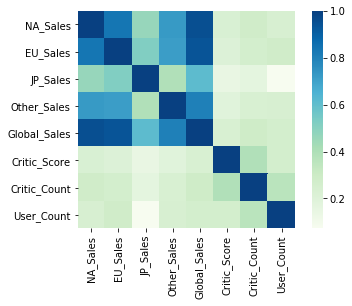

In [25]:
cols = df.columns
cor = df[cols].corr()
sns.heatmap(cor, square = True, cmap='GnBu')

We get rid of _Global_Sales_ as it has high correlation with other types of sales

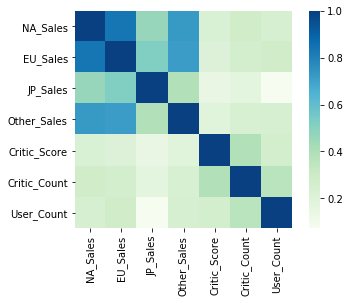

In [26]:
cols = cols.drop('Global_Sales')
cor = df[cols].corr()
sns.heatmap(cor, square = True, cmap='GnBu')

In [27]:
data = df[cols].copy()
data.head(2)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Count
0,41.36,28.96,3.77,8.45,76.0,51.0,322.0
2,15.68,12.76,3.79,3.29,82.0,73.0,709.0


We also should scale our data

In [28]:
scaler = MinMaxScaler()
data[data.columns] = scaler.fit_transform(data[data.columns])
data.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Count
0,1.000000,1.000000,0.580000,0.799432,0.741176,0.436364,0.029828
2,0.379110,0.440608,0.583077,0.311258,0.811765,0.636364,0.066129
3,0.377418,0.377417,0.504615,0.279092,0.788235,0.636364,0.017634
6,0.272727,0.315608,1.000000,0.272469,0.894118,0.563636,0.040053
7,0.337524,0.316989,0.450769,0.268685,0.529412,0.345455,0.011725


We can use clusterization to preduct global sales for a game. We may use 3 values to indicate the score: __high, average, low__

In [29]:
kmeans = KMeans(n_clusters=3)
predicted = kmeans.fit_predict(data)

In [30]:
df['kmeans'] = predicted
df.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count,kmeans
0,41.36,28.96,3.77,8.45,82.53,76.0,51.0,322.0,1
2,15.68,12.76,3.79,3.29,35.52,82.0,73.0,709.0,1
3,15.61,10.93,3.28,2.95,32.77,80.0,73.0,192.0,1
6,11.28,9.14,6.50,2.88,29.80,89.0,65.0,431.0,1
7,13.96,9.18,2.93,2.84,28.92,58.0,41.0,129.0,1


In [31]:
df[df.kmeans == 0].describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count,kmeans
count,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.0
mean,0.160301,0.080898,0.016429,0.029204,0.286980,52.542857,17.648980,30.376020,0.0
std,0.230733,0.166517,0.069987,0.063324,0.426312,9.650302,10.966386,73.215074,0.0
min,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000,0.0
25%,0.050000,0.010000,0.000000,0.000000,0.077500,47.000000,9.000000,7.000000,0.0
50%,0.090000,0.030000,0.000000,0.010000,0.160000,55.000000,15.000000,12.000000,0.0
75%,0.180000,0.090000,0.000000,0.030000,0.330000,60.000000,25.000000,27.000000,0.0
max,3.480000,2.990000,1.120000,1.680000,7.200000,65.000000,59.000000,1340.000000,0.0


In [32]:
df[df.kmeans == 1].describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count,kmeans
count,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.0
mean,0.802624,0.532672,0.145772,0.184156,1.665199,79.353438,56.750302,490.398673,1.0
std,1.717325,1.226373,0.496800,0.488410,3.509859,8.778467,13.906851,1028.607976,0.0
min,0.000000,0.000000,0.000000,0.000000,0.010000,47.000000,32.000000,4.000000,1.0
25%,0.150000,0.060000,0.000000,0.030000,0.340000,74.000000,46.000000,55.000000,1.0
50%,0.360000,0.210000,0.010000,0.070000,0.760000,80.000000,54.000000,132.000000,1.0
75%,0.820000,0.520000,0.080000,0.170000,1.667500,85.000000,65.000000,445.750000,1.0
max,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,10665.000000,1.0


In [33]:
df[df.kmeans == 2].describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count,kmeans
count,3399.000000,3399.000000,3399.000000,3399.000000,3399.000000,3399.000000,3399.000000,3399.000000,3399.0
mean,0.319715,0.174728,0.049379,0.061633,0.605766,76.019712,21.561636,101.311856,2.0
std,0.551275,0.377585,0.196890,0.144900,1.052988,7.208361,9.464889,338.031503,0.0
min,0.000000,0.000000,0.000000,0.000000,0.010000,63.000000,4.000000,4.000000,2.0
25%,0.050000,0.020000,0.000000,0.010000,0.100000,70.000000,14.000000,11.000000,2.0
50%,0.140000,0.050000,0.000000,0.020000,0.270000,75.000000,21.000000,23.000000,2.0
75%,0.355000,0.170000,0.000000,0.060000,0.660000,81.000000,29.000000,58.500000,2.0
max,9.010000,8.490000,3.630000,2.930000,21.790000,98.000000,41.000000,9851.000000,2.0


As we can see <code>cluster=0</code> corresponds to __low sales__. Also it can be noted that games from this cluster have _the lowest_ critic scores.

Games from <code>cluster=1</code> can be described as of __average sales__. The critics' scores of those games are much higher than the scores of games from cluster 0.

<code>Cluster=2</code> has the highest scores and sales.